# 使用 Tensorflow 来建立线性回归模型
## 验证
- y = Wx + b, 首先构造出1000个点，W= 0.1, b = 0.3
- 再用 tf 去找出 什么样的 W, b 可以拟合上一步所产生的点


In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

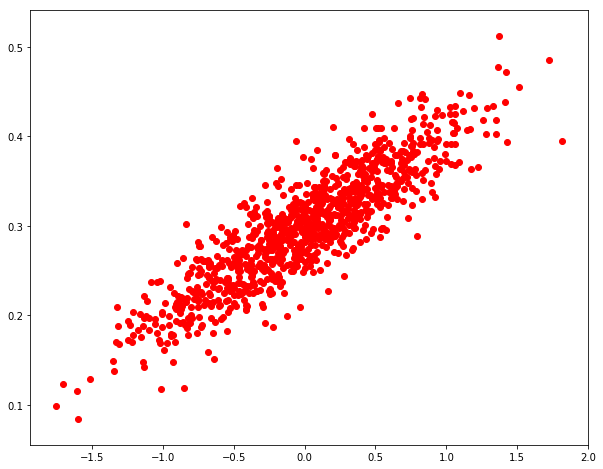

In [23]:
# 随机产生 1000个点，围绕在  0.1x + 0.3 直线周围
num_points = 1000
vector_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = 0.1 * x1 + 0.3 + np.random.normal(0.0, 0.03)
    vector_set.append([x1, y1])
    
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]
    
fig = plt.figure(figsize=(10,8))
fig.add_subplot(111)
plt.scatter(x_data, y_data, c='r')
plt.show()

In [43]:
# 生成一维矩阵，取值是 [-1, 1]区间上的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

y = W * x_data + b

# 以预估值 y 与实际 y_data的方差作为 loss 函数
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')

# 采用 梯度下降 算法来优化参数 
optimizer = tf.train.GradientDescentOptimizer(0.5)

# 训练过程是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()
init = tf.global_variables_initializer()

sess.run(init)

print ('W=', sess.run(W), 'b=', sess.run(b), 'loss=', sess.run(loss))


# 训练 20次 
for step in range(20):
    sess.run(train)
    print ('Step.%s'% step, 'W=', sess.run(W), 'b=', sess.run(b), 'loss=', sess.run(loss))
    

('W=', array([-0.13357472], dtype=float32), 'b=', array([0.], dtype=float32), 'loss=', 0.10700604)
('Step.0', 'W=', array([-0.06030571], dtype=float32), 'b=', array([0.29802507], dtype=float32), 'loss=', 0.009019959)
('Step.1', 'W=', array([-0.00940827], dtype=float32), 'b=', array([0.29825863], dtype=float32), 'loss=', 0.0046632974)
('Step.2', 'W=', array([0.02528936], dtype=float32), 'b=', array([0.29842082], dtype=float32), 'loss=', 0.002638591)
('Step.3', 'W=', array([0.04894331], dtype=float32), 'b=', array([0.2985314], dtype=float32), 'loss=', 0.0016976333)
('Step.4', 'W=', array([0.06506862], dtype=float32), 'b=', array([0.29860678], dtype=float32), 'loss=', 0.0012603343)
('Step.5', 'W=', array([0.07606152], dtype=float32), 'b=', array([0.2986582], dtype=float32), 'loss=', 0.0010571048)
('Step.6', 'W=', array([0.08355556], dtype=float32), 'b=', array([0.2986932], dtype=float32), 'loss=', 0.0009626566)
('Step.7', 'W=', array([0.08866438], dtype=float32), 'b=', array([0.2987171], 

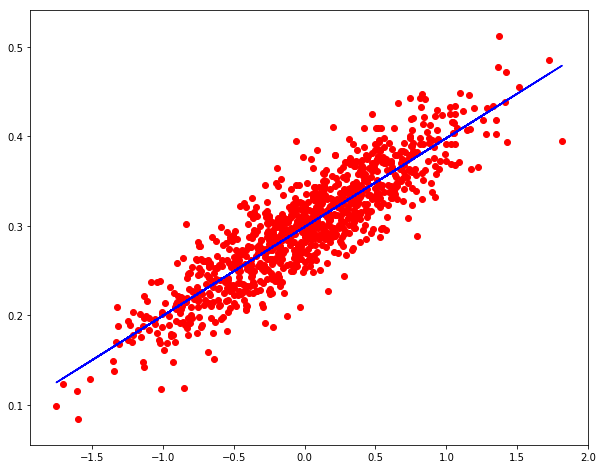

In [42]:
plt.figure(figsize=(10,8))   
plt.scatter(x_data,y_data, c='r')
plt.plot(x_data, sess.run(W)*x_data+sess.run(b), c='b')